# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#defining the units
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amos
Processing Record 2 of Set 1 | puerto pilon
Processing Record 3 of Set 1 | makokou
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | kulia village
City not found. Skipping...
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | greymouth
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | pokhara
Processing Record 12 of Set 1 | inhambane
Processing Record 13 of Set 1 | massakory
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | umm kaddadah
Processing Record 17 of Set 1 | sao jose de piranhas
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | sishilichengzi
City not found. Skipping...
Processing Record 20 of Set 1 | taoudenni
Processing

Processing Record 37 of Set 4 | parauapebas
Processing Record 38 of Set 4 | san antonio de pale
Processing Record 39 of Set 4 | mejit
Processing Record 40 of Set 4 | labuan
Processing Record 41 of Set 4 | lakhipur
Processing Record 42 of Set 4 | uturoa
Processing Record 43 of Set 4 | yinchuan
Processing Record 44 of Set 4 | kertih
Processing Record 45 of Set 4 | yeniseysk
Processing Record 46 of Set 4 | kenai
Processing Record 47 of Set 4 | severo-yeniseyskiy
Processing Record 48 of Set 4 | saipan
Processing Record 49 of Set 4 | baker city
Processing Record 0 of Set 5 | geraldton
Processing Record 1 of Set 5 | xinyuan
Processing Record 2 of Set 5 | flying fish cove
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | red chute
Processing Record 5 of Set 5 | prince albert
Processing Record 6 of Set 5 | corn island
Processing Record 7 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 5 | ketchikan
Processing Record 9 of Set 5 | usogorsk

Processing Record 31 of Set 8 | laramie
Processing Record 32 of Set 8 | falmouth
Processing Record 33 of Set 8 | puerto wilches
Processing Record 34 of Set 8 | acapulco de juarez
Processing Record 35 of Set 8 | pitimbu
Processing Record 36 of Set 8 | rongelap
Processing Record 37 of Set 8 | boende
Processing Record 38 of Set 8 | hailun
Processing Record 39 of Set 8 | qaqortoq
Processing Record 40 of Set 8 | arawa
Processing Record 41 of Set 8 | az zulfi
Processing Record 42 of Set 8 | kavaratti
Processing Record 43 of Set 8 | narasapur
Processing Record 44 of Set 8 | antonio enes
Processing Record 45 of Set 8 | bafra
Processing Record 46 of Set 8 | joshimath
Processing Record 47 of Set 8 | freeport
Processing Record 48 of Set 8 | nagqu
Processing Record 49 of Set 8 | porto novo
Processing Record 0 of Set 9 | nemuro
Processing Record 1 of Set 9 | vanino
Processing Record 2 of Set 9 | thunder bay
Processing Record 3 of Set 9 | ruangwa
Processing Record 4 of Set 9 | timbuktu
Processing Re

Processing Record 19 of Set 12 | yarmouth
Processing Record 20 of Set 12 | klucze
Processing Record 21 of Set 12 | papao
Processing Record 22 of Set 12 | isabela
Processing Record 23 of Set 12 | dhidhdhoo
Processing Record 24 of Set 12 | kapa'a
Processing Record 25 of Set 12 | den burg
Processing Record 26 of Set 12 | serhetabat
Processing Record 27 of Set 12 | narvik
Processing Record 28 of Set 12 | nuuk
Processing Record 29 of Set 12 | braslaw
Processing Record 30 of Set 12 | rahimah
Processing Record 31 of Set 12 | lazaro cardenas
Processing Record 32 of Set 12 | christiansburg
Processing Record 33 of Set 12 | ganserndorf
Processing Record 34 of Set 12 | jaleshwar
Processing Record 35 of Set 12 | zhangye
Processing Record 36 of Set 12 | hadibu
Processing Record 37 of Set 12 | lembar
City not found. Skipping...
Processing Record 38 of Set 12 | besancon
Processing Record 39 of Set 12 | aitape
Processing Record 40 of Set 12 | armacao de buzios
Processing Record 41 of Set 12 | polla
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,amos,48.5669,-78.1162,-13.63,93,100,3.43,CA,1701224103
1,puerto pilon,9.3644,-79.7933,25.86,90,100,4.31,PA,1701224298
2,makokou,0.5738,12.8642,21.11,98,100,0.99,GA,1701224298
3,adamstown,-25.0660,-130.1015,23.02,87,3,7.36,PN,1701224309
4,lebu,-37.6167,-73.6500,10.74,79,0,5.85,CL,1701224314


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("saved_graphs/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("saved_graphs/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amos,48.5669,-78.1162,-13.63,93,100,3.43,CA,1701224103
1,puerto pilon,9.3644,-79.7933,25.86,90,100,4.31,PA,1701224298
2,makokou,0.5738,12.8642,21.11,98,100,0.99,GA,1701224298
3,adamstown,-25.0660,-130.1015,23.02,87,3,7.36,PN,1701224309
4,lebu,-37.6167,-73.6500,10.74,79,0,5.85,CL,1701224314


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

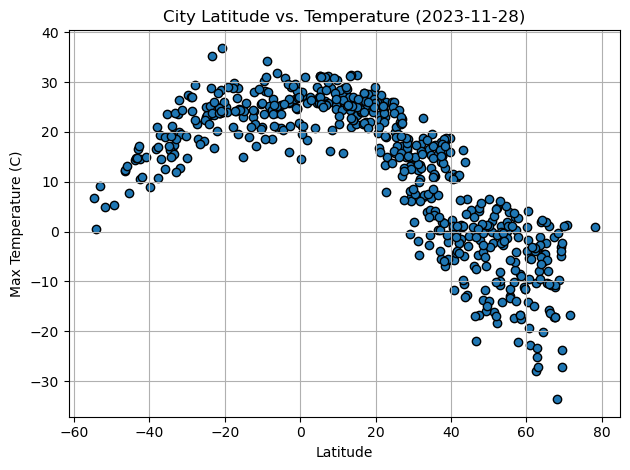

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha= 1, edgecolors = "k")

#converting date to be y/m/d to match the format of the sample output data
date = datetime.now()
date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("saved_graphs/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

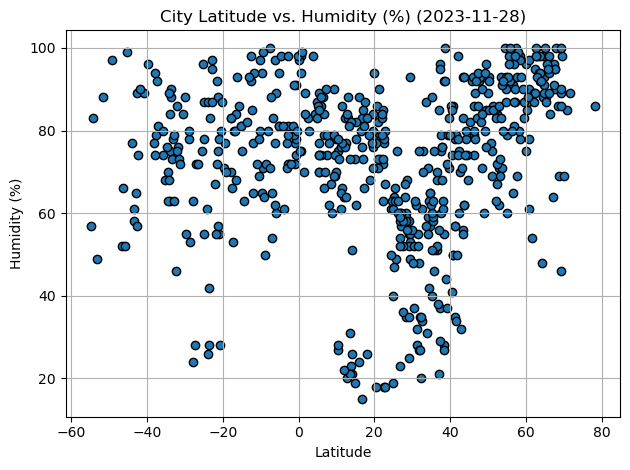

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=1, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("saved_graphs/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

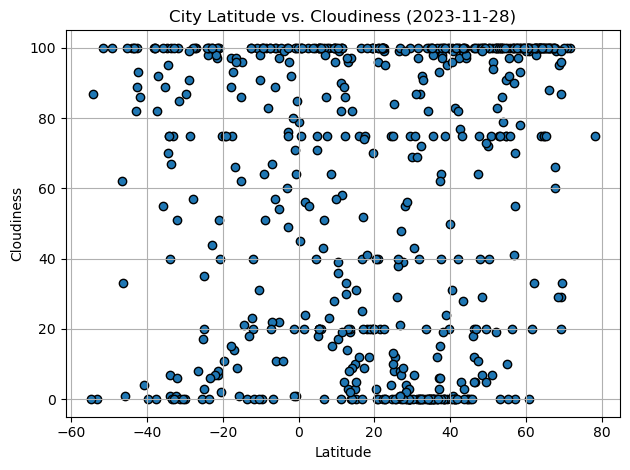

In [52]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=1, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("saved_graphs/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

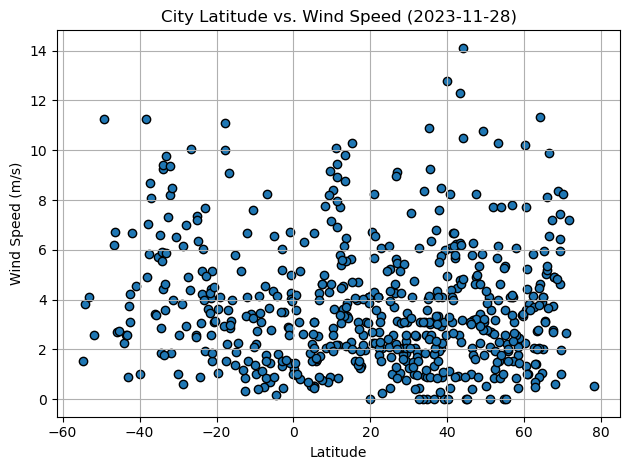

In [53]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=1, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("saved_graphs/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
#commented out to not run into any errors since we're going to use
#the same formula later to build linear regression plots using different values below

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,amos,48.5669,-78.1162,-13.63,93,100,3.43,CA,1701224103
1,puerto pilon,9.3644,-79.7933,25.86,90,100,4.31,PA,1701224298
2,makokou,0.5738,12.8642,21.11,98,100,0.99,GA,1701224298
5,colonia,50.9333,6.9500,2.14,77,75,4.12,DE,1701224315
9,pokhara,28.2333,83.9833,16.40,35,4,1.98,NP,1701224080


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,23.02,87,3,7.36,PN,1701224309
4,lebu,-37.6167,-73.6500,10.74,79,0,5.85,CL,1701224314
6,greymouth,-42.4667,171.2000,14.62,74,93,4.22,NZ,1701224315
7,port-aux-francais,-49.3500,70.2167,5.31,97,100,11.24,TF,1701224315
8,afaahiti,-17.7500,-149.2833,28.93,83,97,10.02,PF,1701223810


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8726784357136377


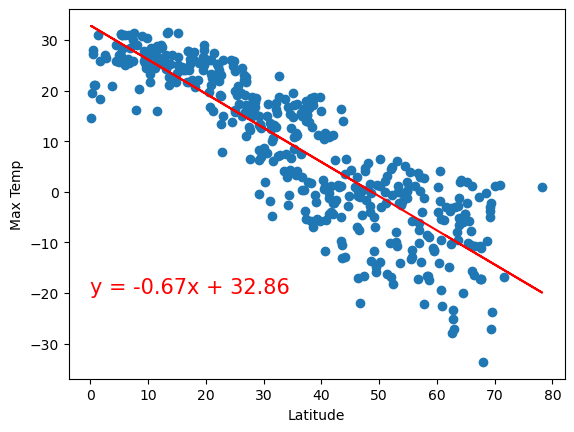

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.7001774530588567


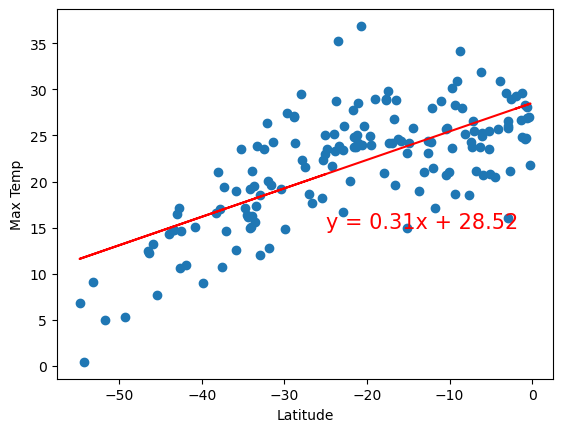

In [47]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** In regards to the Northern Hemisphere, the regression displays a relationship between temperature and latitude with an R value of an estimated -0.87 which can be considered a strong negative correlation. We can see that as the latitude increases and the distance from the equator increases, the max temperature decreases. On the other hand for Southern Hemisphere, the opposite appears to be occurring. The regression displays a relationship with an R value of an estimated 0.7 which can be considered a strong positive correlation between temperature and latitude. As the latitude increases, you move closer to the equator and the max temperature generally increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.328236621636812


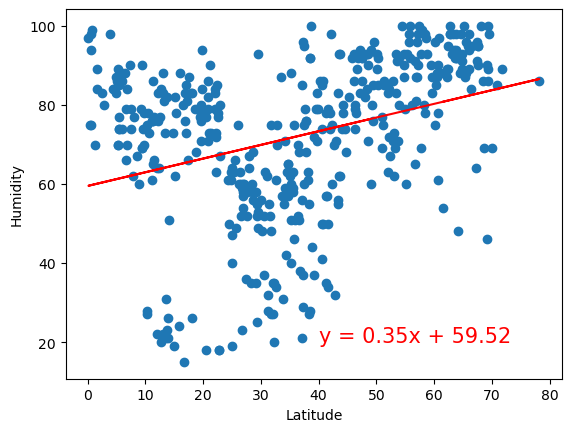

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.15261405105728373


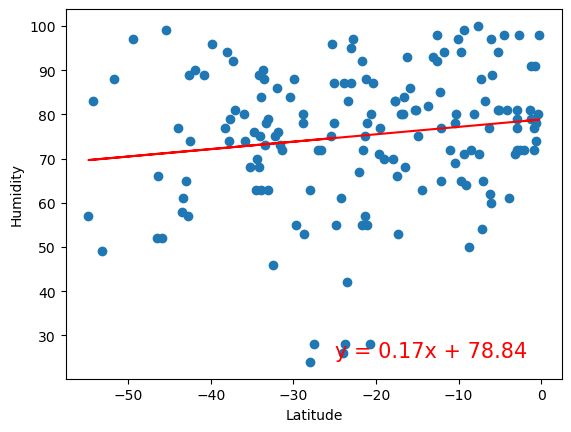

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** For both Northern and Southern hemisphere in respect to humidity and latitude, the relationship is slightly positive but not very strong. The R value for the Northern hemisphere was calculated to be an estimated 0.33 and for the Southern Hemisphere, r = 0.15 which can both be classified as weak correlations. Through this we can see that there is a weak positive correlation that exists, however there is not enough evidence to prove that there is a defininte coorelation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.26857684607719434


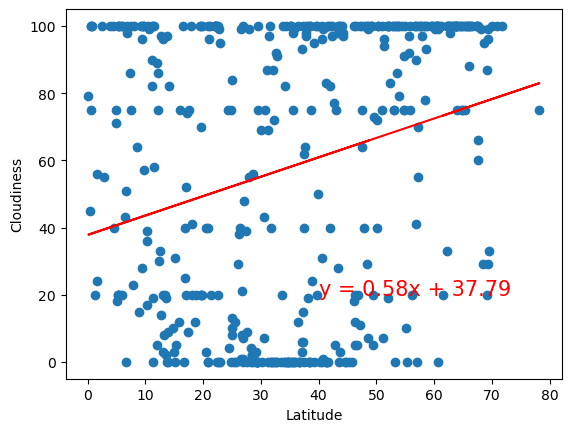

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.018281557656272825


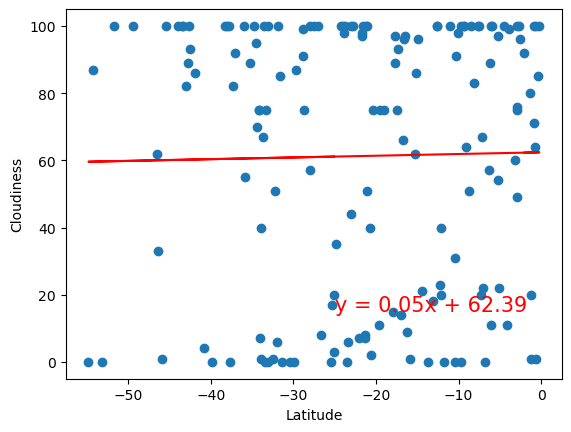

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** For the Northern Hemisphere, there appears to be a positve correlation between latitude and cloudiness with an estimated r-value of 0.27, however it cannot be considered a strong correlation. For the Southern Hemisphere, the r-value was calculated to be an estimated 0.08 which is even weaker than what was found for the Northern Hemisphere, almost none at all. With the data collected, there is not enough evidence to indicate there is a coorelation between latitude and cloudiness however weak correlations between the two were found.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.046699903139058654


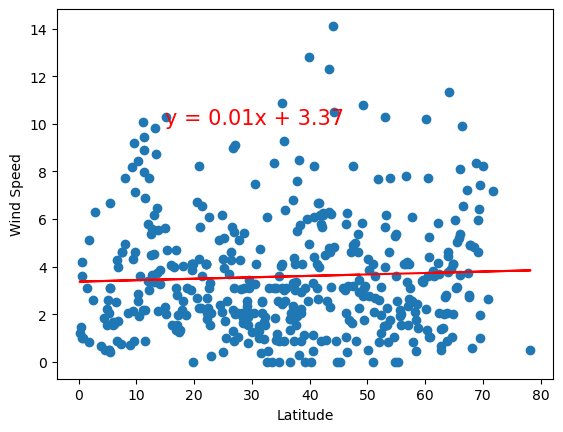

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.2994260365825328


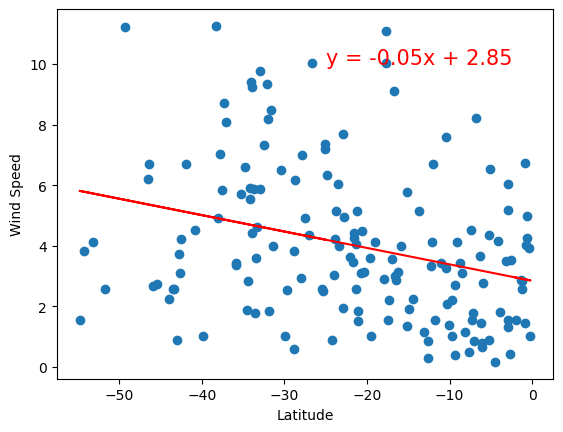

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** For the Northern hemisphere, wind speed and latitude appear have a slight positive correlation with an r-value of 0.05 but this can be considered a generally weak correlation. For the Southern hemisphere, there is a negative correlation with an r-value of an estimated -0.30. Although this is slightly stronger than the correlation for the Northern hemisphere, it is also considered weak. Therefore with the data provided, there is not enough evidence to be able to confirm that wind speed and latitude are correlated however there are some weak correlations.